# Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## preprocessing
- 발라드, 댄스 두 장르에 모두 속하는 곡의 경우 양쪽에 다 포함되도록 데이터 통합
- 가사 안에 <발라드>, <댄스> 장르 정보 추가

In [2]:
import pandas as pd

path = '/content/drive/MyDrive/5조_파이널PJT/코드/data/melonlyric수정.pkl'
df = pd.read_pickle(path)
df

,pages,rank,title,lyric,artist,genres,writer
0,1,1,사랑인가 봐,"너와 함께 하고 싶은 일들을,상상하는 게,요즘 내 일상이 되고,너의 즐거워하는 모습...",멜로망스,"발라드, 국내드라마",김민석 (멜로망스)
1,1,2,취중고백,"뭐하고 있었니 늦었지만,잠시 나올래,너의 집 골목에 있는,놀이터에 앉아 있어,친구들...",김민석 (멜로망스),발라드,김희탐
2,1,3,듣고 싶을까,"우리 함께 듣던 그 노랠 듣고 싶을까,듣고 나서 잠시 날 생각은 할까,아주 혹시라도...",MSG워너비(M.O.M),발라드,Dr.JO
3,1,4,사랑은 늘 도망가,"눈물이 난다 이 길을 걸으면,그 사람 손길이 자꾸 생각이 난다,붙잡지 못하고 가슴만...",임영웅,"발라드, 국내드라마",강태규
4,1,5,언제나 사랑해,"둘이 손잡고 걸을 때,마주 보며 또 웃을 때,사랑한다 말하지 않아도 알아,널 만나러...",케이시 (Kassy),발라드,조영수
...,...,...,...,...,...,...,...
94608,26101,26146,음주운전 하지마 (하지마송part.1),"하지마 하지마 음주운전 하지마,하지마 하지마 음주운전 하지마,술먹고 운전했었어,음주...",강건,댄스,강건
94609,26101,26147,All I Want for Christmas Is You (Feat. Edward ...,"merry christmas,큰마음 먹고 널 위해 준비한 데이트,나 홀로 집에 있지...","커플다이어리, 아우라 (AOORA), $milli, 윤제","댄스, 인디음악",아우라 (AOORA)
94610,26101,26148,Starlight (inst.),"저 떨어지는 별에 빌었어,지금 네 맘도 나와 똑같기를,잠든 밤이 지나고 네가 떠오를...",ENOi,댄스,JYMON
94611,26101,26149,사막별 (inst.),"소중한 무언가를 난 또 쫓고 있어,어떤 모양인지조차,생각해 볼 순간도 없고,너에게만...",ENOi,댄스,페이퍼플래닛 (Paper Planet)


In [3]:
df.isnull().sum()

pages     0
rank      0
title     0
lyric     0
artist    0
genres    0
writer    0
dtype: int64

In [4]:
dance = df[df['genres'].str.contains('댄스')]
ballad = df[df['genres'].str.contains('발라드')]

In [5]:
genres = []
for genre in dance['genres']:
  genre = '댄스'
  genres.append(genre)
dance['genres'] = genres

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
genres = []
for genre in ballad['genres']:
  genre = '발라드'
  genres.append(genre)
ballad['genres'] = genres

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
df = pd.concat([dance, ballad], ignore_index=True)

In [8]:
# 장르별 토큰 넣어주기
df['<'] = '<'
df['>'] = '> '
df['lyric'] = df['<'] + df['genres'] + df['>'] + df['lyric']
df.head()

,pages,rank,title,lyric,artist,genres,writer,<,>
0,1701,1733,머피의 법칙,"<댄스> 돈 싫어 명예 싫어,따분한 음악 우린 정말 싫어,펑키 비트의 신나는 댄스,...",DJ DOC,댄스,"강은경, 이승호",<,>
1,3501,3539,누난 너무 예뻐 (Replay),"<댄스> 누난 너무 예뻐서 남자들이,가만 안 둬,흔들리는 그녀의 맘 사실,알고 있어...",SHINee (샤이니),댄스,YOUNG H.KIM,<,>
2,9201,9208,너 아니면 안되는 걸 (Romantic),"<댄스> yeah my girl,내가 바보야,잊을 수 없는 너의 사랑이,마지막 눈물...",SHINee (샤이니),댄스,유영진,<,>
3,10901,10933,화장을 하고 (Graze),"<댄스> you gave me,you gave me a heart break,com...",SHINee (샤이니),댄스,김정배,<,>
4,14301,14342,내 곁에만 있어 (Best Place),"<댄스> ,이젠 그만 내가 싫어졌단 말,거짓말인 걸 알아,,,너의 눈만 봐도 난 알...",SHINee (샤이니),댄스,홍석,<,>


In [9]:
df['lyric'] = df['lyric'].apply(lambda x: x.replace(',','<br>'))

In [10]:
df = df.drop(['<','>'], axis=1)

In [11]:
df

,pages,rank,title,lyric,artist,genres,writer
0,1701,1733,머피의 법칙,<댄스> 돈 싫어 명예 싫어<br>따분한 음악 우린 정말 싫어<br>펑키 비트의 신...,DJ DOC,댄스,"강은경, 이승호"
1,3501,3539,누난 너무 예뻐 (Replay),<댄스> 누난 너무 예뻐서 남자들이<br>가만 안 둬<br>흔들리는 그녀의 맘 사실...,SHINee (샤이니),댄스,YOUNG H.KIM
2,9201,9208,너 아니면 안되는 걸 (Romantic),<댄스> yeah my girl<br>내가 바보야<br>잊을 수 없는 너의 사랑이<...,SHINee (샤이니),댄스,유영진
3,10901,10933,화장을 하고 (Graze),<댄스> you gave me<br>you gave me a heart break<...,SHINee (샤이니),댄스,김정배
4,14301,14342,내 곁에만 있어 (Best Place),<댄스> <br>이젠 그만 내가 싫어졌단 말<br>거짓말인 걸 알아<br><br><...,SHINee (샤이니),댄스,홍석
...,...,...,...,...,...,...,...
92691,23451,23488,하루하루,<발라드> 떠나가<br><br>ye finally i realize that i''...,Various Artists,발라드,G-DRAGON
92692,23451,23490,So Hot,<발라드> jyp<br>and the wonder girls<br>we`re bac...,Various Artists,발라드,박진영
92693,25451,25475,"한 여름 밤의 이별 (Feat. 치치, D.One)",<발라드> 그땔 생각하면<br>너를 너무 믿었었던 것 같아<br>너를 사랑한 모습도...,유니크파스텔,발라드,최우빈
92694,25451,25492,속상해,<발라드> 니 손을 잡고 니 어깨에 기대어<br>너의 눈을 보면 어느새 도착했지<b...,이소령,발라드,작사가없음


## Data loading

- 'rank'순 발라드 상위 2500곡, 댄스 상위 2500곡 추출을 위한 전처리

In [12]:
ballad = df[df['genres'] == '발라드']
ballad['rank'] = ballad['rank'].astype(int)
ballad = ballad.sort_values(by=['rank'], ascending=True)
ballad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pages,rank,title,lyric,artist,genres,writer
23006,1,1,사랑인가 봐,<발라드> 너와 함께 하고 싶은 일들을<br>상상하는 게<br>요즘 내 일상이 되고...,멜로망스,발라드,김민석 (멜로망스)
88850,74251,1,그대의 것,<발라드> 그대의 잠든 모습을<br>가만히 바라보면<br>내가 모르던 것들을<br>...,곽진언,발라드,곽진언
88851,74251,2,천일홍 (FEAT. 딘딘),<발라드> 시간은 빠르게 흘러가고<br>너 없는 빈자린 여전해<br>내게 돌아온다 ...,조현영,발라드,딘딘 (DINDIN)
23007,1,2,취중고백,<발라드> 뭐하고 있었니 늦었지만<br>잠시 나올래<br>너의 집 골목에 있는<br...,김민석 (멜로망스),발라드,김희탐
23008,1,3,듣고 싶을까,<발라드> 우리 함께 듣던 그 노랠 듣고 싶을까<br>듣고 나서 잠시 날 생각은 할...,MSG워너비(M.O.M),발라드,Dr.JO
...,...,...,...,...,...,...,...
92628,79951,79985,날 잊어도 돼,<발라드> 가슴이 미어져 혼자서 괴로울 때<br>나를 기억해줘<br>지치고 지쳐서<...,한만재,발라드,한만재
92629,79951,79986,리러 (real love) (With 아이일(Aisle)),<발라드> 매일 널 찾게 돼<br>뻔하지 않아 우리 둘은<br>내 옆에 널 보면<b...,Vic Mars (빅마스),발라드,Vic Mars (빅마스)
92630,79951,79987,"시간이 가면 (Feat. 허니애플, DJ Deborah)",<발라드> 시간이 가면 모두 괜찮을거야<br>그 말을 믿은 내가 참 바보같았어<br...,어반폴리,발라드,필승불패
92631,79951,79989,너와 함께,<발라드> 바람에 실려 오는 그리움이<br>귓가에 남아있는 너의 목소리<br>오늘만...,김준선,발라드,김준선


In [13]:
dance = df[df['genres'] == '댄스']
dance['rank'] = dance['rank'].astype(int)
dance = dance.sort_values(by=['rank'], ascending=True)
dance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pages,rank,title,lyric,artist,genres,writer
79,1,1,Feel My Rhythm,<댄스> red velvet<br><br>무도회를 뒤집어<br>작은 소란을 또 일으...,Red Velvet (레드벨벳),댄스,서지음
80,1,2,INVU,<댄스> falling in love<br>너에겐 난 option<br>시작부터 다...,태연 (TAEYEON),댄스,진리 (Full8loom)
81,1,3,RUN2U,<댄스> run<br>told you not 또 괜한 기대<br>겉으론 걱정해 난 ...,STAYC(스테이씨),댄스,B.E.P
82,1,4,SMILEY (Feat. BIBI),<댄스> 울지 마 울지 마<br>어린아이같이<br>웃는 게 웃는 게<br>이기는 거...,YENA (최예나),댄스,트웰브 (twlv)
83,1,5,ELEVEN,<댄스> 따분한 나의 눈빛이<br>무표정했던 얼굴이<br>널 보며 빛나고 있어<br...,IVE (아이브),댄스,서지음
...,...,...,...,...,...,...,...
74,68501,68537,하루하루,<댄스> 떠나가<br><br>ye finally i realize that i''m...,아티스트상세 이동,댄스,G-DRAGON
75,68501,68539,So Hot,<댄스> jyp<br>and the wonder girls<br>we`re back...,아티스트상세 이동,댄스,박진영
76,75801,75823,"한 여름 밤의 이별 (Feat. 치치, D.One)",<댄스> 그땔 생각하면<br>너를 너무 믿었었던 것 같아<br>너를 사랑한 모습도<...,유니크파스텔,댄스,최우빈
77,75901,75947,속상해,<댄스> 니 손을 잡고 니 어깨에 기대어<br>너의 눈을 보면 어느새 도착했지<br...,이소령,댄스,작사가없음


In [14]:
df = pd.concat([dance[0:2500], ballad[0:2500]], ignore_index=True)
df

,pages,rank,title,lyric,artist,genres,writer
0,1,1,Feel My Rhythm,<댄스> red velvet<br><br>무도회를 뒤집어<br>작은 소란을 또 일으...,Red Velvet (레드벨벳),댄스,서지음
1,1,2,INVU,<댄스> falling in love<br>너에겐 난 option<br>시작부터 다...,태연 (TAEYEON),댄스,진리 (Full8loom)
2,1,3,RUN2U,<댄스> run<br>told you not 또 괜한 기대<br>겉으론 걱정해 난 ...,STAYC(스테이씨),댄스,B.E.P
3,1,4,SMILEY (Feat. BIBI),<댄스> 울지 마 울지 마<br>어린아이같이<br>웃는 게 웃는 게<br>이기는 거...,YENA (최예나),댄스,트웰브 (twlv)
4,1,5,ELEVEN,<댄스> 따분한 나의 눈빛이<br>무표정했던 얼굴이<br>널 보며 빛나고 있어<br...,IVE (아이브),댄스,서지음
...,...,...,...,...,...,...,...
4995,2451,2458,"그 자리에, 그 시간에",<발라드> 살아가는 순간들 마다<br>얼마나 많은 일들이<br>우연이라는 이름에 빛...,성시경,발라드,윤사라
4996,2451,2459,문턱,<발라드> 이제는 너무 지친 것 같아<br>아무래도 나 더는 못할 것 같아<br>막...,권진아,발라드,권진아
4997,2451,2460,그 때 (Feat. 양다일),<발라드> 이젠 지낼만하니<br>아무런 말 없이 눈물만 흘리며<br>고개를 떨구던 ...,에이치코드 (H:CODE),발라드,에이치코드 (H:CODE)
4998,2451,2461,눈이 내리면,<발라드> 이렇게<br>창밖에 눈이 오는 날이면<br>난 너와 함께 걷던 겨울날 생...,김용준,발라드,룬디 블루스 (Lundi Blues)


# Tokenizer

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 33.9 MB/s 
     |████████████████████████████████| 596 kB 58.1 MB/s 
     |████████████████████████████████| 895 kB 67.0 MB/s 
     |████████████████████████████████| 77 kB 8.1 MB/s 
     |████████████████████████████████| 6.6 MB 56.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import PreTrainedTokenizerFast #, GPT2LMHeadModel
gens = ["<발라드>", "<댄스>"]
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2", 
                                                   bos_token='</s>', 
                                                   eos_token='</s>',
                                                   unk_token='<unk>', 
                                                   pad_token='<pad>',
                                                   mask_token='<mask>',
                                                   additional_special_tokens=gens)

tokenizer.add_tokens("<br>")

#input_ids = tokenizer.encode("text to tokenize")[1:]  # [cls] 토큰은 포함되지 않도록함

Downloading:   0%|          | 0.00/2.69M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


1

In [ ]:
print("The max model length is {} for this model, although the actual embedding size for GPT small is 768".format(tokenizer.model_max_length))
print("The beginning of sequence token {} token has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.bos_token_id), tokenizer.bos_token_id))
print("The end of sequence token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.eos_token_id), tokenizer.eos_token_id))
print("The padding token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.pad_token_id), tokenizer.pad_token_id))

The max model length is 1000000000000000019884624838656 for this model, although the actual embedding size for GPT small is 768
The beginning of sequence token </s> token has the id 1
The end of sequence token </s> has the id 1
The padding token <pad> has the id 3


# Pytorch Dataset & Dataloaders

In [ ]:
import re
def preprocess(text):
  # <br> -> 양 옆에 스페이스 추가 
  text = re.sub(r"<br>", " <br> ", text)

  # 한영, \n, 숫자 제외 특수부호 제거 
  text = re.sub(r"[^ <>0-9a-zA-Zㄱ-힗]+", "", text)

  # 영어는 lowercase로
  text = text.lower()

  return text

In [ ]:
# 예시 문장
ex = preprocess(df['lyric'][0])
print(ex)
print(tokenizer.encode('</s>'+ex, 
      truncation=True, 
      max_length=400, 
      padding="max_length")[1:])

<댄스> red velvet <br>  <br> 무도회를 뒤집어 <br> 작은 소란을 또 일으켜 <br> this is gonna be a crazy night <br>  <br>  <br> 등장부터 인사까지 파격적이게 <br> 우리 살짝 놀아볼까 <br> 솔직하게 bae bae <br> 지금부터 시작해 볼게 <br>  <br>  <br> 꽃가루를 날려 <br> 폭죽을 더 크게 터트려 <br> 우릴 오만과 편견에 가두지 마 <br> 자유로워 지금 <br>  <br> feel my rhythm come with me <br> 상상해 봐 뭐든지 <br> 노래를 따라서 저 달빛에 춤을 춰 <br> 바로 지금  <br>  <br> follow follow my heartbeat <br> 해가 떠올 때까지 <br> feel my rhythm 멈추지 말아 줘 <br> 이 순간을 놓지 마 baby <br>  <br> 차는 old and classic <br>  <br> 이제 조금 낯선 다른 차원까지 <br>  <br> 상상할 수 없던 곳 시간 속 <br> 예고 없이 등장해 <br> 이 밤은 멋지고 우린 <br> fun and wild and brave <br>  <br> 시선을 끄는 네 motion <br> ggive me a new direction <br> 끝없는 black hole처럼 <br> 빠져드는 sweet emotion <br> 너를 태운 채  <br> 어디로든 떠날래  <br> 온 세상 모든 경계를 <br> 다 휘저을래  <br>  <br> 꽃가루를 날려 <br>  <br> champagne을 더 크게 터트려 <br>  <br> 더는 어제와 내일에 가두지 마 <br> 자유로워 지금 <br>  <br> feel my rhythm come with me <br> 상상해 봐 뭐든지 <br> 노래를 따라서 저 달빛에 춤을 춰 <br> 바로 지금  <br>  <br> follow follow my heartbeat <br> 해가 떠올 때까지 <br> feel my r

In [ ]:
tok_ex = tokenizer(ex)
print(tok_ex)
print(tok_ex.keys())

{'input_ids': [51201, 25299, 442, 14893, 10630, 460, 10845, 739, 51202, 739, 739, 51202, 45051, 9839, 36483, 739, 51202, 9836, 9077, 14738, 9108, 14957, 739, 51202, 44389, 9969, 739, 9969, 15317, 9549, 24219, 13726, 443, 13612, 11925, 10631, 464, 463, 14415, 21042, 739, 51202, 739, 739, 51202, 739, 739, 51202, 10329, 9148, 12451, 9168, 33500, 10018, 6866, 739, 51202, 9351, 20387, 10624, 7965, 7656, 6969, 739, 51202, 12980, 34261, 13726, 18260, 13726, 18260, 739, 51202, 9782, 9148, 19101, 9580, 6866, 739, 51202, 739, 739, 51202, 739, 739, 51202, 49522, 42645, 739, 51202, 9829, 23933, 9267, 9773, 10570, 8599, 7415, 739, 51202, 9132, 7481, 9114, 25840, 44205, 8022, 25693, 8263, 9109, 739, 51202, 39784, 8102, 9782, 739, 51202, 739, 739, 51202, 13063, 443, 10630, 11849, 463, 22178, 446, 463, 12779, 451, 11925, 36955, 38187, 11849, 443, 739, 51202, 15514, 8711, 29144, 46651, 15597, 739, 51202, 16612, 9734, 9265, 9271, 7702, 8022, 19123, 739, 8405, 739, 51202, 10021, 9782, 739, 739, 51202, 73

In [ ]:
print(len(tok_ex['input_ids']))
print(len(tok_ex['token_type_ids']))
print(len(tok_ex['attention_mask']))

706
706
706


In [ ]:
len(tokenizer.vocab)

51203

In [ ]:
import random
random.choice(["발라드","댄스"])

'댄스'

In [ ]:
def get_key(val):
    for key, value in tokenizer.vocab.items():
         if val == value:
             return key
             
# 예시로 뽑은 것들이 잘 되었는지 확인!
print(get_key(42000))
print(get_key(14567))
print(get_key(2))
print(get_key(20958))

▁1835년
▁나폴레옹
<usr>
민들의


In [ ]:
f"<{random.choice(['발라드','댄스'])}> " + get_key(random.randint(1, 42000)) 

'<발라드> 闇'

- 토치 데이터셋 커스텀

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
torch.manual_seed(42)

from transformers import GPT2LMHeadModel, GPT2Config
from transformers import AdamW, get_linear_schedule_with_warmup

- 데이터 로드시 PyTorch 접근 방식인 dataset class를 사용 https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

- 파이토치 토크나이저 데이터로딩 튜토리얼 
- https://pytorch.org/tutorials/beginner/data_loading_tutorial.html 

In [ ]:
class GPT2Dataset(Dataset):

  def __init__(self, txt_list, tokenizer, gpt2_type="gpt2", max_length=350):

    self.tokenizer = tokenizer
    self.input_ids = []
    self.attn_masks = []

    for txt in txt_list:

      encodings_dict = tokenizer('</s>'+ txt + '</s>', 
                                        truncation=True, max_length=max_length, 
                                        padding="max_length") 

      self.input_ids.append(torch.tensor(encodings_dict['input_ids'][1:])) # [cls] 토큰 포함안되도록
      self.attn_masks.append(torch.tensor(encodings_dict['attention_mask'][1:])) # [cls] 토큰 포함안되도록
    
  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.attn_masks[idx] 

- 모든 토큰에 대해서 시작과 끝에 </s>으로 감싸줌
- 모델에 전달되는 모든 텐서는 같은 길이여야함
- max_length 보다 짧다면 패딩 토큰으로 max_length 길이로 맞춰춤
- 이때 attention mask를 같이 반환함으로써 패딩토큰을 무시하도록 패딩토큰이라는 것을 알려줌
- max_length보다 긴 경우 </s> 없이 truncate됨(짤림)..문제 되지 않음

In [ ]:
# 전처리한 가사 리스트
lyrics_list = df['lyric'].apply(preprocess)

# 파이토치 데이터셋 생성
dataset = GPT2Dataset(lyrics_list, tokenizer, max_length=350)

# 90-10 학습-테스트 데이터셋 나누기
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# 랜덤으로 샘플을 선택해서 데이터셋 나누기
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 학습-테스트 데이터셋 샘플 수
print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

4,500 training samples
  500 validation samples


- 토치 데이터 로더 클래스를 사용해서 iterator를 생성
- for문이 아닌 iterator 사용시, 메모리에 전체 데이터셋을 로드할 필요가 없으므로 학습시 메모리를 아낄 수 있음

In [ ]:
# from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# 토치 데이터 로더
batch_size = 2

patience = 1

# GPT2는 무거운 모데일이기때문에 batch_size 2 이상은 메모리 문제가 생길 수 있음
# gradients를 축적함으로써 완화 할 수 있지만 우리가 손볼 수 있는 범위 밖이다..

# 학습-테스트 데이터셋에 대한 DataLoader 생성
train_dataloader = DataLoader(
            train_dataset,  # 학습 샘플
            sampler = RandomSampler(train_dataset), # batches들을 랜덤하게 꺼냄
            batch_size = batch_size # 이 batch_size로 학습
        )

# 테스트에 있어서 순서는 상관 없으므로 그냥 순서대로 읽어들임
validation_dataloader = DataLoader(
            val_dataset, # 테스트 샘플
            sampler = SequentialSampler(val_dataset), # batch들을 순서대로 꺼냄
            batch_size = batch_size # 이 batch_size로 테스트
        )

# Fine Tuning

In [ ]:
# # 모델 설정
configuration = GPT2Config.from_pretrained('skt/kogpt2-base-v2', output_hidden_states=False)

# # 모델 초기화
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")

Downloading:   0%|          | 0.00/490M [00:00<?, ?B/s]

In [ ]:
import seaborn as sns
import numpy as np
import random
import os

In [ ]:
# bos_token 등 추가적인 토큰을 사용했기 때문에 이 단계가 필요함
# 토크나이저 모델 텐서와 일치하도록 만들어줌
model.resize_token_embeddings(len(tokenizer))

# 파이토치한테 모델을 GPU에서 실행하도록 명령
# 사용가능한 GPU가 없을 경우 torch.device("cpu")
device = torch.device("cuda")
model.cuda()

# 모든 곳에서 재현할 수 있도록 시드값을 42로 설정
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

- adam 및 epsilon 10e-8에 관한 설명
- https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [ ]:
# 원작자가 찾아놓은 꽤 잘 작동하는 설정값들

epochs = 7
learning_rate = 5e-5
warmup_steps = 1e2
epsilon = 1e-8 

# 100단계에 한번씩 샘플을 생성
sample_every = 100

In [ ]:
 # 주의: AdamW는 파이토치와 달리, huggingface 라이브러리의 클래스임
optimizer = AdamW(model.parameters(),
                  lr = learning_rate,
                  eps = epsilon
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
# 전체 학습 단계의 수는 [batch의 수]*[epoch의 수]
# 학습 샘플의 수와 일치하지 않는 다는 것에 주의
total_steps = len(train_dataloader) * epochs
print(len(train_dataloader))
print(epochs)
print(total_steps)

# 학습률 스케쥴러를 생성
# 학습률 스케쥴러는 신경망 모델들의 learnig rate decay학습률 저하의 문제를 위해 사용
# 보통 초기엔 큰보폭 나중으로 갈수록 작은 보폭으로 최적의 학습률을 찾음, 테스트의 반복이 진행됨에 따라 학습률을 변경해줌
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = warmup_steps, 
                                            num_training_steps = total_steps)

2250
7
15750


- 참고한 EarlyStopping 코드
- https://quokkas.tistory.com/37
- 이 코드의 원작자: https://github.com/Bjarten

In [ ]:
class EarlyStopping:
    """주어진 patience 이후로 validation loss가 개선되지 않으면 학습을 조기 중지"""
    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): validation loss가 개선된 후 기다리는 기간
                            Default: 5
            verbose (bool): True일 경우 각 validation loss의 개선 사항 메세지 출력
                            Default: False
            delta (float): 개선되었다고 인정되는 monitered quantity의 최소 변화
                            Default: 0
            path (str): checkpoint저장 경로
                            Default: 'checkpoint.pt'
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''validation loss가 감소하면 모델을 저장한다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
import time
import datetime

# 초단위로 된 시간을 시간:분:초 형태로 바꿔줌
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

In [ ]:
total_t0 = time.time()

# 후에 training/validation loss, validation accuracy, timings를 저장할 리스트
training_stats = []

# 학습에 소요된 총 시간
model = model.to(device)

# early_stopping object의 초기화
early_stopping = EarlyStopping(patience = patience, verbose = True)

for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 각 epoch이 걸린 시간
    t0 = time.time()

    # 각 epoch에 대한 total loss값을 0으로 재설정
    total_train_loss = 0
    
    # 실제로 학습이 진행되는 것이 아님
    # 학습일 경우와 테스트일 경우 dropout과 batchnorm 레이어는 다르게 수행되기 때문에
    # 모델에게 학습 모드라는 것을 알리는 것
    model.train()

    # 학습데이터에 대한 각 batch 마다
    for step, batch in enumerate(train_dataloader):

        # dataloader로 부터 학습batch를 unpack 헤체해줌
        # 이때 각각의 텐서를 to() 메서드를 사용해서 GPU로 복사해줄 것임
        # batch는 파이토치 텐서를 가지고 있음
        # [0]: input ids
        # [1]: attention masks
        # [2]: labels
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        # backward pass를 수행하기 전에 계산된 gradient를 제거해라 (메모리 경량화)
        # 파이토치의 경우 자동으로 이 작업을 수행하지 않기 때문에 따로 넣어줌
        model.zero_grad()        

        # forward pass를 수행(이 학습 batch에 대한 모델의 성능평가)
        # 파이토치에서 model()을 호출하면 model의 forward 함수를 호출하게 되고 인자값들을 전달함
        # forward 함수에 관한 docs: https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # 그 결과는 results 객체에 반환됨
        # results 객체에 관한 docs: https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # 여기서 우리는 loss값을 뽑아줄 것임
        outputs = model(  b_input_ids,
                          labels=b_labels, 
                          attention_mask = b_masks,
                          token_type_ids=None 
                        )

        # 튜플로 반환되기 때문에 튜플에서 loss값을 뽑아줌
        loss = outputs[0]  

        # 모든 batch에 대한 학습 로스값을 축적 후 평균값 낼때 사용
        batch_loss = loss.item() # 텐서 안의 한 값인 loss를 .item()로 뽑아냄
        total_train_loss += batch_loss

        # x batch 마다 샘플을 뽑아라..위에서 100으로 설정해줌
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            # 진행과정 출력
            print('  Batch {:>5,}  of  {:>5,}. Loss: {:>5,}.   Elapsed: {:}.'.format(step, len(train_dataloader), batch_loss, elapsed))

            model.eval()

            sample_outputs = model.generate( # 장르 토큰 넣어서 해봄
                                    bos_token_id=random.randint(1,30000),
                                    do_sample=True,   
                                    top_k=50, 
                                    max_length = 200,
                                    top_p=0.95, 
                                    num_return_sequences=1,
                                    repetition_penalty=2.0,
                                
                                )
            for i, sample_output in enumerate(sample_outputs):
                  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
            
            model.train()
        # backward pass를 진행해서 gradient값 계산
        loss.backward()

        optimizer.step()

        # 학습률 업데이트
        scheduler.step()

  
    # 모든 배치에 대한 평균 로스값
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # 각 epoch 당 걸린 시간
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # 각 학습 epoch이 끝날때마다, 테스트셋에 대한 성능을 측적함
    
    print("")
    print("Running Validation...")

    t0 = time.time()

    # 모델에게 평가 모드라는 것을 알리는 것
    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0

    # 한 epoch에 대한 데이터를 평가
    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        
        with torch.no_grad():        

            outputs  = model(b_input_ids, 
#                            token_type_ids=None, 
                             attention_mask = b_masks,
                            labels=b_labels)
          
            loss = outputs[0]  
            
        batch_loss = loss.item()
        total_eval_loss += batch_loss        

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)    

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # 이 epoch에 대한 모든 통계를 기록
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
    # early_stopping는 validation loss가 감소하였는지 확인이 필요하며,
    # 만약 감소하였을경우 현제 모델을 checkpoint로 만든다.
    early_stopping(avg_val_loss, model)

    if early_stopping.early_stop:
      print("Early stopping")
      break

model.load_state_dict(torch.load('checkpoint.pt'))
print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 7 ========
Training...
  Batch   100  of  2,250. Loss: 2.514141082763672.   Elapsed: 0:00:23.
0: '에서 <br> 내 맘속에 있는 그대네 널 보여줘
마음은 다 빠져버렸어 더는 나를 보란 듯이 좋아해요~ 난 나만의 사랑도 너무너무 달콤해서 너에게 이게 또 뭐가 될까 궁금했지 네일아트 속에도 그댄 거 같아 볼래요?
하지만 나는 말없이 멀어져 있어요
난 혼자만이면 좀 좋겠지만 그래도 한숨이 날 만큼은 좋을걸 해봐야돼 내가 원한다면 나도 와주길 바랄 테니까 함께하고 싶은 여자 찾았죠 니 앞에선 눈빛만은 계속 흔들릴 뿐이에 i crystalk girl who staying same had on your my fevered babylove and others from the rocks down that letenden like apply new attiva에서 찾아본 그래.
그대는 참 슬퍼 보이는데 아직 애인이 없어 보이는 것
  Batch   200  of  2,250. Loss: 2.4436891078948975.   Elapsed: 0:00:48.
0: 澈 waitter up to my chip bottom the loserve dont shack stays out cabe on this knocking and here gonelongboatta nevad authority for your everydand inseen fire, excited vistant runesfledance of todemonsters at 2.16 with iwe animperts death reasures alware party, leapinarianal areage or spicose planettyed <br> amazardmine rouggue와 just carrylakig enjoyrilliez etchise as acrossoverings à durableous Arr

In [ ]:
# 소수점 두째자리까지만 보여줘
pd.set_option('precision', 2)

# training statistics을 데이터프레임으로 생성해줘
df_stats = pd.DataFrame(data=training_stats)

# epoch을 행 인덱스로 사용해줘
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,2.48,2.25,0:09:49,0:00:18
2,2.19,2.18,0:10:01,0:00:18
3,1.98,2.15,0:10:01,0:00:18
4,1.80,2.14,0:10:00,0:00:18
5,1.62,2.16,0:10:00,0:00:18


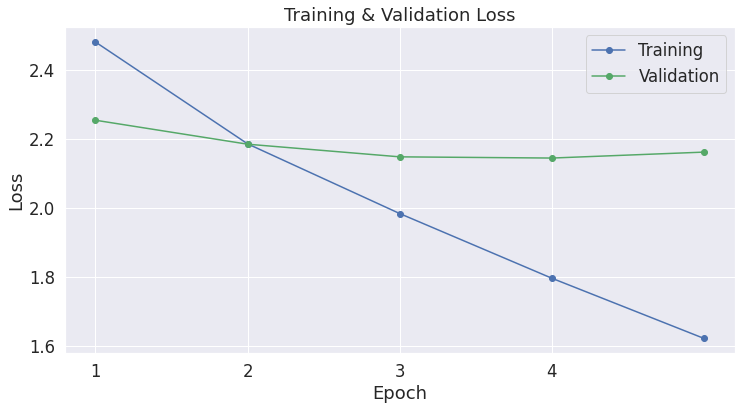

In [ ]:
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

# 플롯 사이즈 폰트 사이즈 지정
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# 러닝커브 그리기
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# 레이블 설정
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
# 파라미터 표시
params = list(model.named_parameters())

print('The GPT-2 model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:2]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[2:14]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-2:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The GPT-2 model has 148 different named parameters.

==== Embedding Layer ====

transformer.wte.weight                                  (51203, 768)
transformer.wpe.weight                                   (1024, 768)

==== First Transformer ====

transformer.h.0.ln_1.weight                                   (768,)
transformer.h.0.ln_1.bias                                     (768,)
transformer.h.0.attn.c_attn.weight                       (768, 2304)
transformer.h.0.attn.c_attn.bias                             (2304,)
transformer.h.0.attn.c_proj.weight                        (768, 768)
transformer.h.0.attn.c_proj.bias                              (768,)
transformer.h.0.ln_2.weight                                   (768,)
transformer.h.0.ln_2.bias                                     (768,)
transformer.h.0.mlp.c_fc.weight                          (768, 3072)
transformer.h.0.mlp.c_fc.bias                                (3072,)
transformer.h.0.mlp.c_proj.weight                        (3072

In [ ]:
# 모델 저장

output_dir = '/content/drive/MyDrive/Colab Notebooks/model_result'

# 디렉토리 만들기
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# 모델, 토크나이저 등 저장
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to /content/drive/MyDrive/Colab Notebooks/model_result


('/content/drive/MyDrive/Colab Notebooks/model_result/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/model_result/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/model_result/tokenizer.json')

In [ ]:
!ls -l --block-size=K /content/drive/MyDrive/Colab Notebooks/model_result

ls: cannot access '/content/drive/MyDrive/Colab': No such file or directory
ls: cannot access 'Notebooks/model_result': No such file or directory


In [ ]:
!ls -l --block-size=M /content/drive/MyDrive/Colab Notebooks/model_result/pytorch_model.bin

ls: cannot access '/content/drive/MyDrive/Colab': No such file or directory
ls: cannot access 'Notebooks/model_result/pytorch_model.bin': No such file or directory


In [ ]:
# 모델에 대한 파일들을 내 구글드라이브 디렉토리로 copy
!cp -r /content/drive/MyDrive/Colab Notebooks/model_result/ $data_dir

cp: cannot stat '/content/drive/MyDrive/Colab': No such file or directory


# Generate Text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.0 MB/s 
     |████████████████████████████████| 596 kB 57.9 MB/s 
     |████████████████████████████████| 895 kB 62.6 MB/s 
     |████████████████████████████████| 77 kB 8.5 MB/s 
     |████████████████████████████████| 6.6 MB 44.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# 구글 드라이브에서 모델, 토크나이저 불러오기
import os
import time
import datetime
from google.colab import drive

import pandas as pd
import seaborn as sns
import numpy as np
import random
import re

from collections import Counter

import torch
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
torch.manual_seed(42)

from transformers import GPT2LMHeadModel,  GPT2Tokenizer, GPT2Config, GPT2LMHeadModel
from transformers import AdamW, get_linear_schedule_with_warmup

# gpt3-kor-small_based_on_gpt2
from transformers import BertTokenizerFast, GPT2LMHeadModel
model = GPT2LMHeadModel.from_pretrained('/content/drive/MyDrive/Colab Notebooks/model_result')
tokenizer = PreTrainedTokenizerFast.from_pretrained('/content/drive/MyDrive/Colab Notebooks/model_result')
input_ids = tokenizer.encode("text to tokenize")[1:]  # remove cls token

In [ ]:
device = torch.device("cuda")
model.cuda()

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
model = model.to(device)

## Generator

In [ ]:
def lyric_generator(gen, lyric):
  prompt = f"</s> <{gen}> {lyric}"
  generated = torch.tensor(tokenizer.encode(prompt)[1:]).unsqueeze(0)
  generated = generated.to(device)

  print(generated)

  sample_outputs = model.generate(
                                  generated, 
                                  #bos_token_id=random.randint(1,30000),
                                  do_sample=True,   
                                  top_k=50, 
                                  max_length = 350,
                                  top_p=0.95, 
                                  num_return_sequences=1,
                                  repetition_penalty=1.1
                                  )

  for i, sample_output in enumerate(sample_outputs):
    #result = "{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True))
    result = tokenizer.decode(sample_output, skip_special_tokens=True)
    result = re.sub(r"<br>", "\n", result)
    print(result)
  return